In [1]:
# NOTEBOOK FOR TESTING GUNNERUS 3 DOF MANEUVERING MODEL
import matplotlib.pyplot as plt
import numpy as np

from simulator.gunnerus import GunnerusManeuvering3DoF
plt.style.use('seaborn-whitegrid')

C:\Users\j-ehy\AppData\Local\Temp\ipykernel_3416\2597218059.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
dt = 0.1                                # Timestep
simtime = 600                           # Simulation time: 10 minutes
t = np.arange(0, simtime, dt)           # time - array

vessel_model = GunnerusManeuvering3DoF(dt=0.1)

eta = np.zeros((len(t), 3))
nu = np.zeros((len(t), 3))
x = np.zeros((len(t), 6))

# Current speed and direction
Uc = 0.5                 # knots
beta_c = np.deg2rad(135) # Current going to south east

tau = np.zeros(3)       # No controll loads


for i in range(1, len(t)):
    _ = vessel_model.x_dot(Uc, beta_c, tau)
    vessel_model.integrate()
    eta[i] = vessel_model.get_eta()
    nu[i] = vessel_model.get_nu()
    x[i] = vessel_model._x

def plot_results():
    x[:, 2] = np.rad2deg(x[:, 2])
    x[:, 5] = np.rad2deg(x[:, 5])

    colors = ['blue', 'blue', 'blue', 'green', 'green', 'green']
    labels = ["N", "E", r'$\psi$', 'u', 'v', 'r']
    fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(18, 6))
    for i in range(6):
        if i < 3:
            plt.sca(axes[0, i])
        else:
            plt.sca(axes[1, i-3])
        plt.plot(t, x[:, i], color=colors[i], label=labels[i])
        plt.legend()
        plt.xlabel("$t \; [s]$")    

    plt.show()

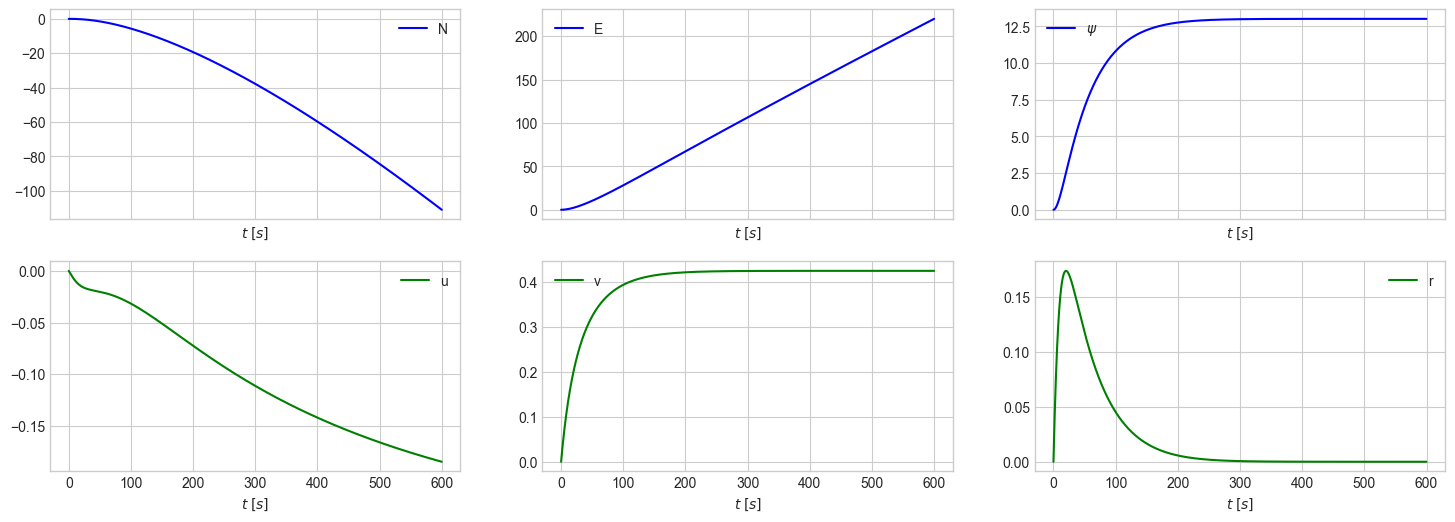

In [3]:
plot_results()

In [4]:
vessel_model.reset()

In [5]:
# Test with input from thrusters - forward thrust only

tau = np.zeros(3)
x = np.zeros((len(t), 6))
tau[2] = 1e4

for i in range(1, len(t)):
    vessel_model.x_dot(0, 0, tau)
    vessel_model.integrate()
    x[i] = vessel_model._x

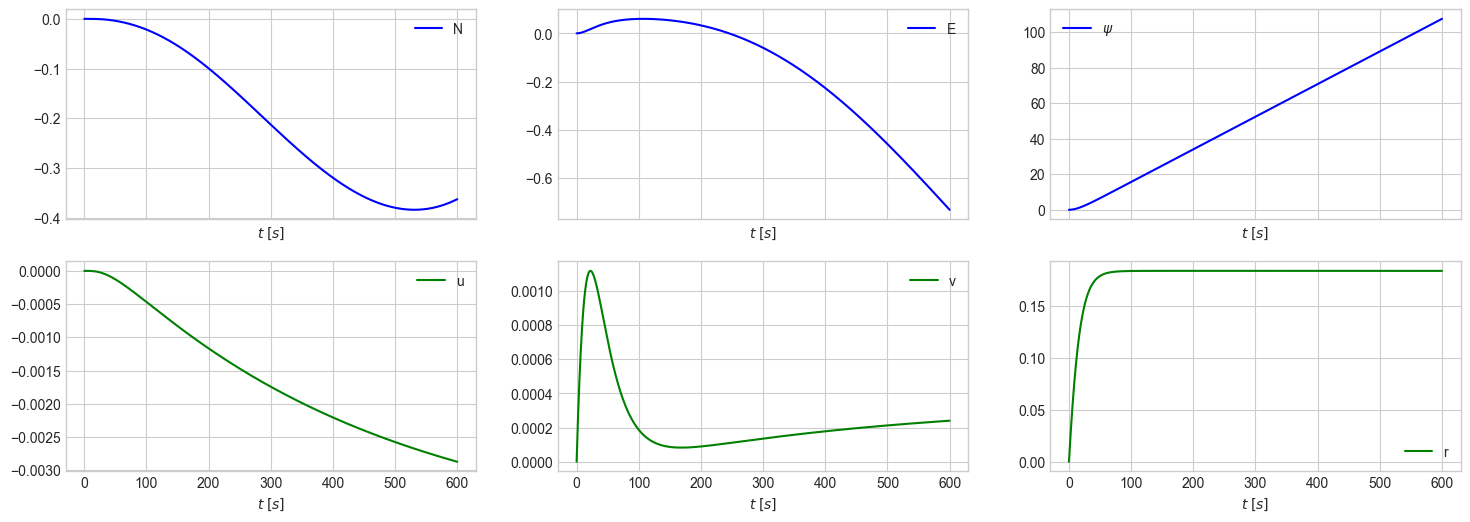

In [6]:
plot_results()

In [13]:
from waves.wave_loads import WaveLoad

# Test if we can create second order wave loads for Gunnerus

wave_amps = np.array([.1, .2, .4, .6, .8, 1.0, 1.3, .5, .1])
freqs = np.array([0.4, 0.3, 0.6, .7, 1.2, .41, .54, .35, .1])
beta = np.ones(len(freqs))

import json
with open(r"C:\Users\j-ehy\OneDrive - NTNU\NTNU\9 semester\ProsjektOppgave\wavemodel\Wave-Model\vessel_data\gunnerus\gunnerus_veres.json", "r") as f:
    param = json.load(f)


# wl = WaveLoad(wave_amps, freqs, np.random.uniform(0, 2*np.pi, size=len(freqs)), beta, config_file=r"C:\Users\j-ehy\OneDrive - NTNU\NTNU\9 semester\ProsjektOppgave\wavemodel\Wave-Model\vessel_data\gunnerus\gunnerus_veres.json", dof=6)

In [27]:
print(np.array(param['driftfrc']['amp'])[:, :, :, 0].shape)
print(np.array(param['driftfrc']['w']).shape)
print(np.array(param['freqs']).shape)
print(np.array(param['headings']))
param['driftfrc'].keys()

(6, 36, 19)
(36,)
(36,)
[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633 1.74532925 1.91986218
 2.0943951  2.26892803 2.44346095 2.61799388 2.7925268  2.96705973
 3.14159265 3.31612558 3.4906585  3.66519143 3.83972435 4.01425728
 4.1887902  4.36332313 4.53785606 4.71238898 4.88692191 5.06145483
 5.23598776 5.41052068 5.58505361 5.75958653 5.93411946 6.10865238]


dict_keys(['amp', 'w'])